In [159]:
import pandas as pd
import numpy as np
from urllib.parse import unquote

# Specify the file path using a raw string (add 'r' prefix)
file_path = r'C:\Users\tonyh\Desktop\ADA\ada-2023-project-oddbits\Data\wikispeedia_paths-and-graph\shortest-path-distance-matrix.txt'

# Read the contents of the file excluding lines starting with #
with open(file_path, 'r') as file:
    lines = file.readlines()
    input_matrix = ''.join(line for line in lines if not line.startswith('#'))

# Split the input matrix into rows
rows = input_matrix.strip().split('\n')

# Initialize an empty 2D list to store the distances
distances = []

In [160]:
# Iterate through each row and convert it into a list of integers
for row in rows:
    row_values = []
    for char in row:
        if char.isdigit():
            row_values.append(int(char))
        elif char == '_':
            row_values.append(None)
    distances.append(row_values)

# Convert the distances list to a NumPy array for easier computation
distance_matrix = np.array(distances)

In [161]:
# Compute the centrality for each article using closeness centrality
centrality = []
num_articles = len(distance_matrix)

for i in range(num_articles):
    Farness = sum(distance_matrix[i, j] for j in range(num_articles) if j != i and distance_matrix[i, j] is not None)
    #avg_shortest_path_length = total_distance / (num_articles - 1)  # Exclude the node itself
    closeness_centrality = 100000 / Farness if Farness != 0 else 0
    centrality.append(closeness_centrality)

# Create a DataFrame with article index and centrality values
df_centrality = pd.DataFrame({
    'Article': range(num_articles),
    'Closeness Centrality': centrality
})

# Print the DataFrame
display(df_centrality)

,Article,Closeness Centrality
0,0,7.261109
1,1,7.882084
2,2,7.773632
3,3,7.412898
4,4,7.279610
...,...,...
4599,4599,8.836264
4600,4600,8.287064
4601,4601,7.811279
4602,4602,6.364967


In [162]:
articles_file_path = r'C:\Users\tonyh\Desktop\ADA\ada-2023-project-oddbits\Data\wikispeedia_paths-and-graph\articles.tsv'

# Read the articles from the articles.tsv file
with open(articles_file_path, 'r') as articles_file:
    articles_lines = articles_file.readlines()

# Extract article names from the articles.tsv file
article_names = [unquote(line.strip()) for line in articles_lines if not line.startswith('#') and line.strip() != 'articles']

In [163]:
# Create a DataFrame with article names and centrality values
df_centrality = pd.DataFrame({
    'Article': article_names,
    'Closeness Centrality': centrality
})

# Print the DataFrame
display(df_centrality)

,Article,Closeness Centrality
0,Áedán_mac_Gabráin,7.261109
1,Åland,7.882084
2,Édouard_Manet,7.773632
3,Éire,7.412898
4,Óengus_I_of_the_Picts,7.279610
...,...,...
4599,Zionism,8.836264
4600,Zirconium,8.287064
4601,Zoroaster,7.811279
4602,Zuid-Gelders,6.364967


In [164]:
categories_file_path = r'C:\Users\tonyh\Desktop\ADA\ada-2023-project-oddbits\Data\wikispeedia_paths-and-graph\categories.tsv'

# Read the categories from the categories.tsv file
with open(categories_file_path, 'r') as categories_file:
    categories_lines = categories_file.readlines()

# Create a dictionary to store the first category for each article
article_first_categories = {}
for line in categories_lines:
    if not line.startswith('#'):
        article, *categories = map(str.strip, map(unquote, line.strip().split('\t')))
        first_category = next((cat.split('.')[-1] for cat in categories if cat.startswith('subject.Countries')), None)
        if first_category is None:
            first_category = next((cat.split('.')[-2] for cat in categories if cat.startswith('subject.Countries.')), None)
        if first_category is not None:
            article_first_categories[article] = first_category

In [165]:
# Create a DataFrame with article names, first categories, and centrality values
df_centrality_first_categories = pd.DataFrame({
    'Article': article_names,
    'First Category': [article_first_categories.get(article, None) for article in article_names],
    'Closeness Centrality': centrality
})

# Print the DataFrame
display(df_centrality_first_categories)

,Article,First Category,Closeness Centrality
0,Áedán_mac_Gabráin,None,7.261109
1,Åland,Countries,7.882084
2,Édouard_Manet,None,7.773632
3,Éire,Countries,7.412898
4,Óengus_I_of_the_Picts,None,7.279610
...,...,...,...
4599,Zionism,None,8.836264
4600,Zirconium,None,8.287064
4601,Zoroaster,None,7.811279
4602,Zuid-Gelders,None,6.364967


In [166]:
# Filter articles by the "Countries" category
countries_df = df_centrality_first_categories[df_centrality_first_categories['First Category'] == 'Countries']

# Print the resulting DataFrame
display(countries_df)

,Article,First Category,Closeness Centrality
1,Åland,Countries,7.882084
3,Éire,Countries,7.412898
94,Abkhazia,Countries,8.076892
101,Abu_Dhabi,Countries,8.022463
127,Afghanistan,Countries,8.658009
...,...,...,...
4448,West_Bank,Countries,8.186656
4453,Western_Sahara,Countries,8.208833
4568,Yemen,Countries,9.004953
4587,Zambia,Countries,8.555784


In [167]:
sorted_countries_df = countries_df.sort_values(['Closeness Centrality'])

display(sorted_countries_df)

,Article,First Category,Closeness Centrality
1594,French_Polynesia,Countries,7.295010
3695,Serbia_and_Montenegro,Countries,7.366483
3,Éire,Countries,7.412898
4257,Turkish_Republic_of_Northern_Cyprus,Countries,7.637086
3808,South_Ossetia,Countries,7.648184
...,...,...,...
2433,Lebanon,Countries,9.322271
1694,Germany,Countries,9.387908
4293,United_Kingdom,Countries,9.462528
331,Argentina,Countries,9.534706


In [168]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway,ttest_ind
import statsmodels.formula.api as smf
import numpy as np

# Import the data with the correct format
data_folder = '../Data'
paths_folder = data_folder + '/wikispeedia_paths-and-graph'

# Define the columns of each dataframe
columns_f = ['hashedIpAddress','timestamp','durationInSec','path','rating']
columns_u = ['hashedIpAddress','timestamp','durationInSec','path','target', 'type']

# Define the path to each dataframe
finished_paths = paths_folder + '/paths_finished.tsv'
unfinished_paths = paths_folder + '/paths_unfinished.tsv'
distance_matrix_file = paths_folder + "/shortest-path-distance-matrix.txt"
articles_list_file = paths_folder + '/articles.tsv'

# Load the Data
df_success = pd.read_csv(finished_paths,comment='#',sep='\t',names=columns_f)
df_fail = pd.read_csv(unfinished_paths,comment='#',sep='\t',names=columns_u)

# Find the median timestamp in df_success
median_timestamp_success = pd.to_datetime(df_success['timestamp'], unit='s').median()
max_timestamp_success = pd.to_datetime(df_success['timestamp'], unit='s').max()

# Find the median timestamp in df_fail
median_timestamp_fail = pd.to_datetime(df_fail['timestamp'], unit='s').median()
max_timestamp_fail = pd.to_datetime(df_fail['timestamp'], unit='s').max()

# Convert the median timestamps to human-readable format
median_timestamp_success_human = median_timestamp_success.strftime('%Y-%m-%d %H:%M:%S')
median_timestamp_fail_human = median_timestamp_fail.strftime('%Y-%m-%d %H:%M:%S')
max_timestamp_success_human = max_timestamp_success.strftime('%Y-%m-%d %H:%M:%S')
max_timestamp_fail_human = max_timestamp_fail.strftime('%Y-%m-%d %H:%M:%S')

In [169]:
def count_countries_in_paths(countries, df_success):
    # Extract the paths from the provided DataFrame
    paths = df_success['path'].tolist()
    
    # Initialize a dictionary to count the occurrences
    country_counts = {country: 0 for country in countries}

    # Count each country's occurrences in paths
    for path in paths:
        for country in countries:
            if country in path.split(';'):
                country_counts[country] += 1

    # Convert the counts to a DataFrame
    counts_df = pd.DataFrame(list(country_counts.items()), columns=['Country', 'Count_in_paths'])

    return counts_df

countries = sorted_countries_df['Article'].tolist()

result_df = count_countries_in_paths(countries, df_success)

merged_df = pd.merge(result_df,sorted_countries_df,left_on='Country',right_on='Article')

display(merged_df)

,Country,Count_in_paths,Article,First Category,Closeness Centrality
0,French_Polynesia,17,French_Polynesia,Countries,7.295010
1,Serbia_and_Montenegro,24,Serbia_and_Montenegro,Countries,7.366483
2,Éire,0,Éire,Countries,7.412898
3,Turkish_Republic_of_Northern_Cyprus,16,Turkish_Republic_of_Northern_Cyprus,Countries,7.637086
4,South_Ossetia,11,South_Ossetia,Countries,7.648184
...,...,...,...,...,...
224,Lebanon,69,Lebanon,Countries,9.322271
225,Germany,1738,Germany,Countries,9.387908
226,United_Kingdom,3807,United_Kingdom,Countries,9.462528
227,Argentina,214,Argentina,Countries,9.534706


In [170]:
df = merged_df.drop(['Article', 'First Category'], axis=1)

display (df)

,Country,Count_in_paths,Closeness Centrality
0,French_Polynesia,17,7.295010
1,Serbia_and_Montenegro,24,7.366483
2,Éire,0,7.412898
3,Turkish_Republic_of_Northern_Cyprus,16,7.637086
4,South_Ossetia,11,7.648184
...,...,...,...
224,Lebanon,69,9.322271
225,Germany,1738,9.387908
226,United_Kingdom,3807,9.462528
227,Argentina,214,9.534706


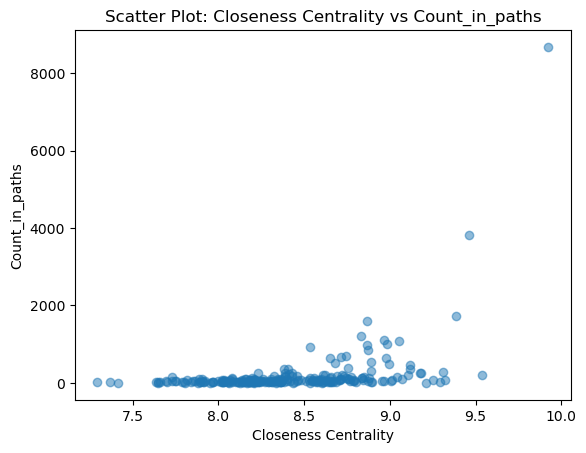

In [171]:
import matplotlib.pyplot as plt

# Assuming 'Count_in_paths' and 'Closeness Centrality' are columns in your DataFrame df
x_values = df['Closeness Centrality']
y_values = df['Count_in_paths']

# Plotting
plt.scatter(x_values, y_values, alpha=0.5)
plt.title('Scatter Plot: Closeness Centrality vs Count_in_paths')
plt.xlabel('Closeness Centrality')
plt.ylabel('Count_in_paths')
plt.show()


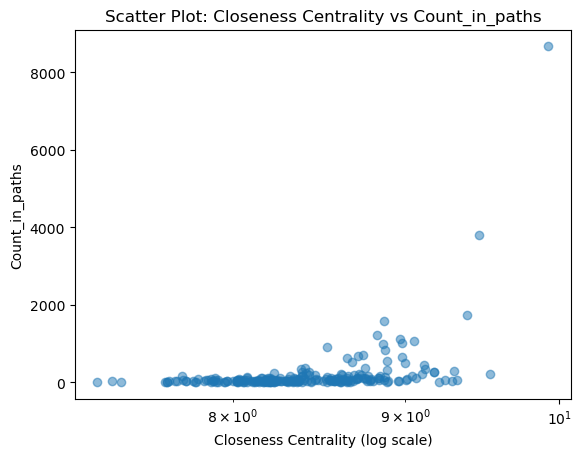

In [172]:
import matplotlib.pyplot as plt

# Assuming 'Count_in_paths' and 'Closeness Centrality' are columns in your DataFrame df
x_values = df['Closeness Centrality']
y_values = df['Count_in_paths']

# Plotting
plt.scatter(x_values, y_values, alpha=0.5)
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.title('Scatter Plot: Closeness Centrality vs Count_in_paths')
plt.xlabel('Closeness Centrality (log scale)')
plt.ylabel('Count_in_paths')
plt.show()


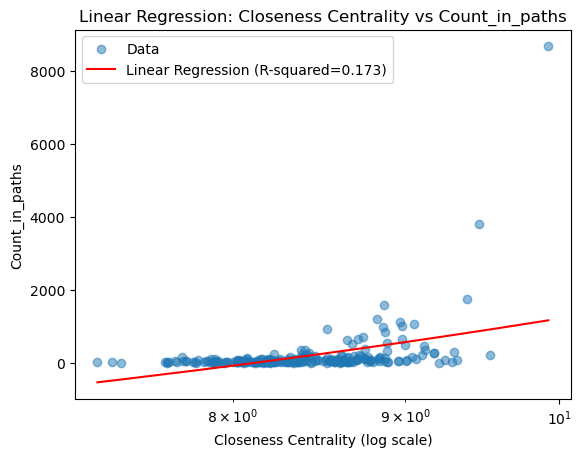

646.2425874698731 -5247.152494967644 0.4157824034713003 5.498715375783825e-11 93.82144395898493


In [173]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming 'Count_in_paths' and 'Closeness Centrality' are columns in your DataFrame df
x_values = df['Closeness Centrality']
y_values = df['Count_in_paths']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Plotting
plt.scatter(x_values, y_values, alpha=0.5, label='Data')
plt.plot(x_values, intercept + slope * x_values, 'r', label=f'Linear Regression (R-squared={r_value**2:.3f})')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.title('Linear Regression: Closeness Centrality vs Count_in_paths')
plt.xlabel('Closeness Centrality (log scale)')
plt.ylabel('Count_in_paths')
plt.legend()
plt.show()

print(slope, intercept, r_value, p_value, std_err)


In [174]:
connected = sum(distance_matrix[:, :] == 1)
countries_df_filtered = countries_df.drop(['First Category','Closeness Centrality'],axis=1).copy()

In [175]:
connected = (distance_matrix[:, :] == 1).sum(axis=1)
countries_df_filtered = countries_df.drop(['First Category', 'Closeness Centrality'], axis=1).copy()

for row in countries_df_filtered.index:
    countries_df_filtered.loc[row, 'connections'] = connected[row]

display(countries_df_filtered)


,Article,connections
1,Åland,19.0
3,Éire,8.0
94,Abkhazia,31.0
101,Abu_Dhabi,23.0
127,Afghanistan,66.0
...,...,...
4448,West_Bank,29.0
4453,Western_Sahara,34.0
4568,Yemen,140.0
4587,Zambia,96.0


In [176]:
df_filtered = pd.merge(df,countries_df_filtered,right_on="Article",left_on="Country").drop(columns=['Article'])
display(df_filtered)

,Country,Count_in_paths,Closeness Centrality,connections
0,French_Polynesia,17,7.295010,8.0
1,Serbia_and_Montenegro,24,7.366483,11.0
2,Éire,0,7.412898,8.0
3,Turkish_Republic_of_Northern_Cyprus,16,7.637086,12.0
4,South_Ossetia,11,7.648184,17.0
...,...,...,...,...
224,Lebanon,69,9.322271,192.0
225,Germany,1738,9.387908,169.0
226,United_Kingdom,3807,9.462528,168.0
227,Argentina,214,9.534706,163.0


In [179]:
display(df_filtered.sort_values("Count_in_paths",ascending=False))
display(df_filtered.sort_values("Closeness_Centrality",ascending=False))
display(df_filtered.sort_values("connections",ascending=False))

,Country,Count_in_paths,Closeness_Centrality,connections
228,United_States,8675,9.924573,294.0
226,United_Kingdom,3807,9.462528,168.0
225,Germany,1738,9.387908,169.0
196,France,1588,8.869180,85.0
190,India,1216,8.830802,81.0
...,...,...,...,...
20,Åland,0,7.882084,19.0
78,Cocos_(Keeling)_Islands,0,8.206138,24.0
64,Côte_d'Ivoire,0,8.169267,44.0
46,Bahamas,0,8.063866,27.0


,Country,Count_in_paths,Closeness_Centrality,connections
228,United_States,8675,9.924573,294.0
227,Argentina,214,9.534706,163.0
226,United_Kingdom,3807,9.462528,168.0
225,Germany,1738,9.387908,169.0
224,Lebanon,69,9.322271,192.0
...,...,...,...,...
4,South_Ossetia,11,7.648184,17.0
3,Turkish_Republic_of_Northern_Cyprus,16,7.637086,12.0
2,Éire,0,7.412898,8.0
1,Serbia_and_Montenegro,24,7.366483,11.0


,Country,Count_in_paths,Closeness_Centrality,connections
228,United_States,8675,9.924573,294.0
224,Lebanon,69,9.322271,192.0
222,Armenia,27,9.295408,186.0
220,Georgia_(country),0,9.208951,180.0
215,Turkey,215,9.104980,172.0
...,...,...,...,...
5,Saint_Kitts_and_Nevis,6,7.649939,12.0
3,Turkish_Republic_of_Northern_Cyprus,16,7.637086,12.0
1,Serbia_and_Montenegro,24,7.366483,11.0
2,Éire,0,7.412898,8.0


In [178]:
df_filtered = df_filtered.rename(columns={'Closeness Centrality': 'Closeness_Centrality'})

In [180]:
df_filtered = df_filtered.astype({'Count_in_paths': 'int16', 'connections': 'int16', 'Closeness_Centrality': 'float16'})
display(df_filtered)

,Country,Count_in_paths,Closeness_Centrality,connections
0,French_Polynesia,17,7.296875,8
1,Serbia_and_Montenegro,24,7.367188,11
2,Éire,0,7.414062,8
3,Turkish_Republic_of_Northern_Cyprus,16,7.636719,12
4,South_Ossetia,11,7.648438,17
...,...,...,...,...
224,Lebanon,69,9.320312,192
225,Germany,1738,9.390625,169
226,United_Kingdom,3807,9.460938,168
227,Argentina,214,9.531250,163


In [181]:
model = smf.ols(formula='Count_in_paths ~ connections', data=df_filtered).fit()
summary1 = model.summary()
print(summary1)

model2 = smf.ols(formula='Count_in_paths ~ connections  + Closeness_Centrality + Closeness_Centrality *  connections', data=df_filtered).fit()
summary2 = model2.summary()
print(summary2)


                            OLS Regression Results                            
Dep. Variable:         Count_in_paths   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     65.06
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           4.17e-14
Time:                        19:15:40   Log-Likelihood:                -1782.8
No. Observations:                 229   AIC:                             3570.
Df Residuals:                     227   BIC:                             3576.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -227.7810     64.353     -3.540      

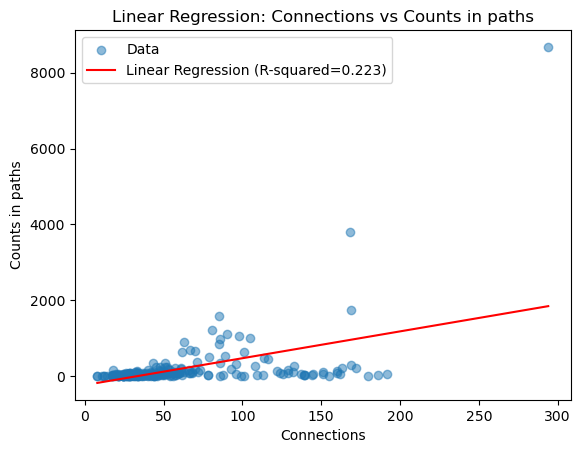

7.06746714912306 -227.780951784279 0.4719893977036882 4.1711341742929414e-14 0.8761778889760472


In [182]:
# Assuming 'Count_in_paths' and 'Closeness Centrality' are columns in your DataFrame df
x_values = df_filtered['connections']
y_values = df_filtered['Count_in_paths']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Plotting
plt.scatter(x_values, y_values, alpha=0.5, label='Data')
plt.plot(x_values, intercept + slope * x_values, 'r', label=f'Linear Regression (R-squared={r_value**2:.3f})')
#plt.xscale('log')  # Set x-axis to logarithmic scale
plt.title('Linear Regression: Connections vs Counts in paths')
plt.xlabel('Connections')
plt.ylabel('Counts in paths')
plt.legend()
plt.show()

print(slope, intercept, r_value, p_value, std_err)

In [183]:
df_filtered = df_filtered[(df_filtered.Country!="United_States")].copy()
df_filtered = df_filtered[(df_filtered.Country!="United_Kingdom")].copy()
display(df_filtered)

,Country,Count_in_paths,Closeness_Centrality,connections
0,French_Polynesia,17,7.296875,8
1,Serbia_and_Montenegro,24,7.367188,11
2,Éire,0,7.414062,8
3,Turkish_Republic_of_Northern_Cyprus,16,7.636719,12
4,South_Ossetia,11,7.648438,17
...,...,...,...,...
222,Armenia,27,9.296875,186
223,Israel,291,9.304688,169
224,Lebanon,69,9.320312,192
225,Germany,1738,9.390625,169


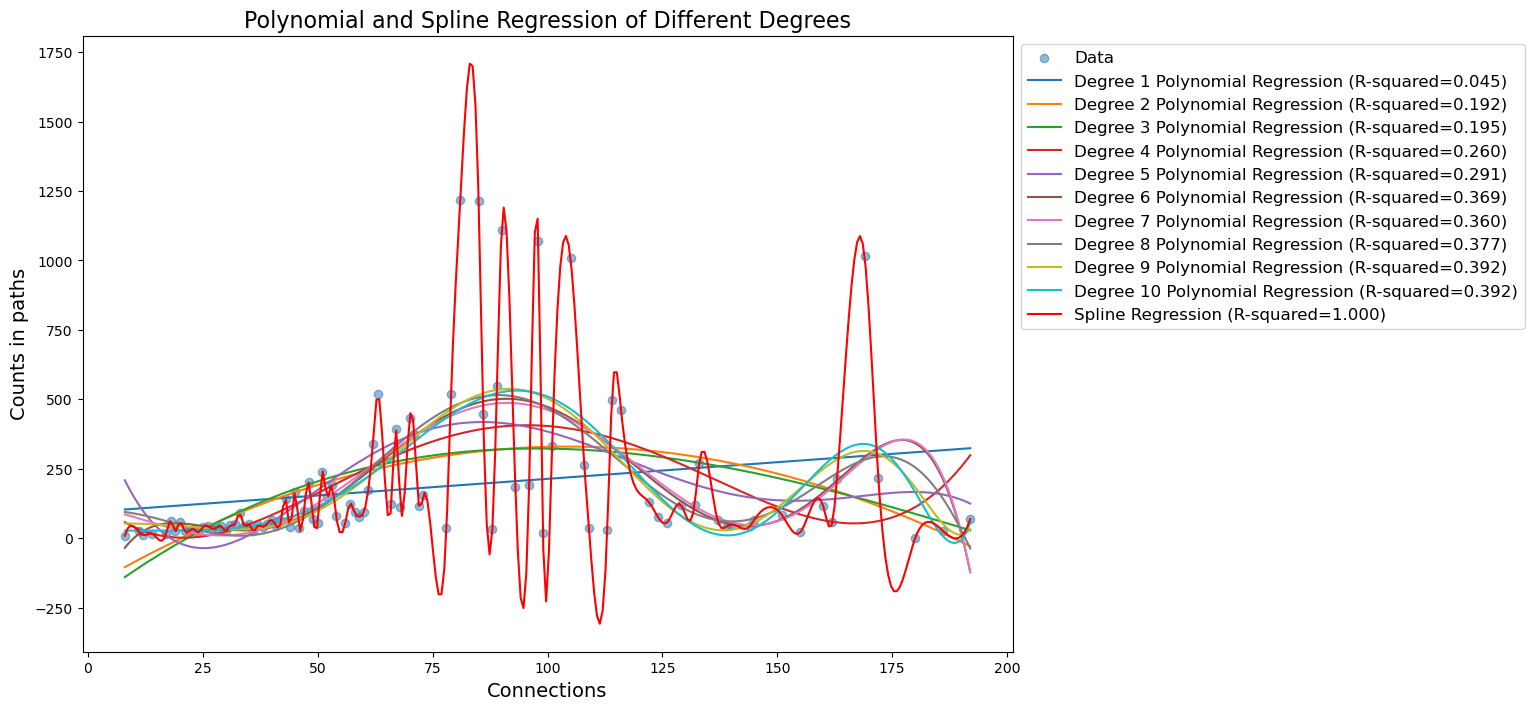

In [184]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.interpolate import make_interp_spline
from sklearn.metrics import r2_score

# Group by 'connections' and take the mean of 'Count_in_paths'
df_grouped = df_filtered.groupby('connections')['Count_in_paths'].mean().reset_index().copy()

# Set a larger figure size
plt.figure(figsize=(12, 8))

# Plotting
plt.scatter(df_grouped['connections'], df_grouped['Count_in_paths'], alpha=0.5, label='Data')

# Polynomial Regression for degrees up to 10
for degree in range(1, 11):
    poly_features = PolynomialFeatures(degree=degree)
    x_poly = poly_features.fit_transform(df_grouped[['connections']])
    poly_model = LinearRegression().fit(x_poly, df_grouped['Count_in_paths'])
    
    # Plot Polynomial Regression
    x_smooth = np.linspace(df_grouped['connections'].min(), df_grouped['connections'].max(), 300)
    y_smooth = poly_model.predict(poly_features.fit_transform(x_smooth.reshape(-1, 1)))
    r2 = poly_model.score(x_poly, df_grouped['Count_in_paths'])  # Calculate R-squared
    plt.plot(x_smooth, y_smooth, label=f'Degree {degree} Polynomial Regression (R-squared={r2:.3f})')



# Spline Regression
spl = make_interp_spline(df_grouped['connections'], df_grouped['Count_in_paths'], k=3)
x_smooth_spline = np.linspace(df_grouped['connections'].min(), df_grouped['connections'].max(), 300)
y_smooth_spline = spl(x_smooth_spline)
r2_spline = r2_score(df_grouped['Count_in_paths'], spl(df_grouped['connections']))  # Calculate R-squared for spline
plt.plot(x_smooth_spline, y_smooth_spline, 'r', label=f'Spline Regression (R-squared={r2_spline:.3f})')


# Set plot labels and legend outside the plot for better visibility
plt.title('Polynomial and Spline Regression of Different Degrees', fontsize=16)
plt.xlabel('Connections', fontsize=14)
plt.ylabel('Counts in paths', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

plt.show()

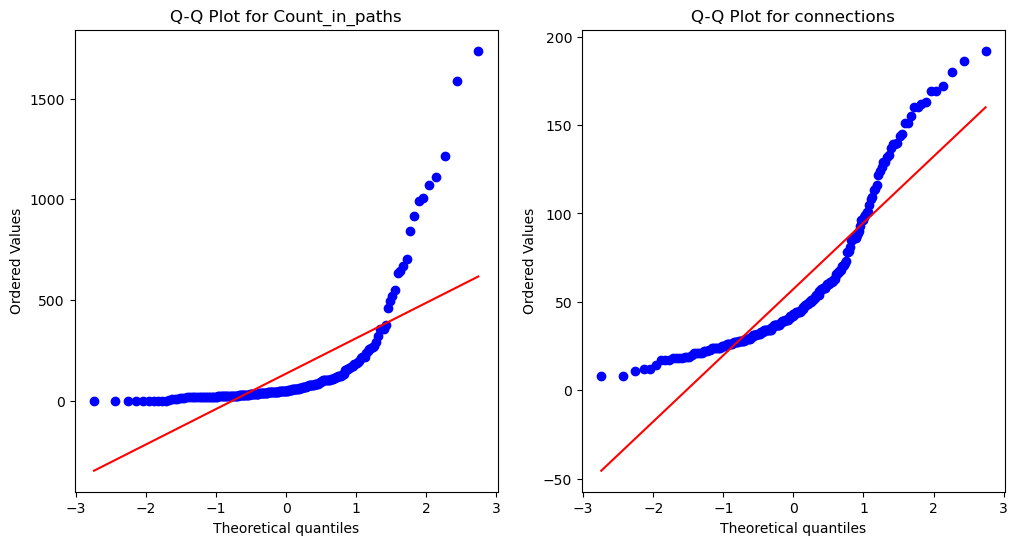

In [185]:
import matplotlib.pyplot as plt
from scipy.stats import probplot

# Assuming 'df_filtered' is your DataFrame
# Separate the columns for Q-Q plot
count_in_paths = df_filtered['Count_in_paths']
connections = df_filtered['connections']

# Plot Q-Q for 'Count_in_paths'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
probplot(count_in_paths, dist="norm", plot=plt)
plt.title('Q-Q Plot for Count_in_paths')

# Plot Q-Q for 'connections'
plt.subplot(1, 2, 2)
probplot(connections, dist="norm", plot=plt)
plt.title('Q-Q Plot for connections')

plt.show()


In [186]:
display(df_filtered)

,Country,Count_in_paths,Closeness_Centrality,connections
0,French_Polynesia,17,7.296875,8
1,Serbia_and_Montenegro,24,7.367188,11
2,Éire,0,7.414062,8
3,Turkish_Republic_of_Northern_Cyprus,16,7.636719,12
4,South_Ossetia,11,7.648438,17
...,...,...,...,...
222,Armenia,27,9.296875,186
223,Israel,291,9.304688,169
224,Lebanon,69,9.320312,192
225,Germany,1738,9.390625,169


In [187]:
import pycountry

def get_country_code(country_name):
    # Replace underscores with spaces
    country_name = country_name.replace('_', ' ')

    try:
        country = pycountry.countries.get(name=country_name)
        return country.alpha_3
    except AttributeError:
        return None

# Add 'Country_Code' column
df_filtered['Country_Code'] = df_filtered['Country'].apply(get_country_code)

In [188]:
display(df_filtered)

,Country,Count_in_paths,Closeness_Centrality,connections,Country_Code
0,French_Polynesia,17,7.296875,8,PYF
1,Serbia_and_Montenegro,24,7.367188,11,None
2,Éire,0,7.414062,8,None
3,Turkish_Republic_of_Northern_Cyprus,16,7.636719,12,None
4,South_Ossetia,11,7.648438,17,None
...,...,...,...,...,...
222,Armenia,27,9.296875,186,ARM
223,Israel,291,9.304688,169,ISR
224,Lebanon,69,9.320312,192,LBN
225,Germany,1738,9.390625,169,DEU


In [189]:
df_filtered = df_filtered[df_filtered['Country_Code'].notna()]
display(df_filtered)

,Country,Count_in_paths,Closeness_Centrality,connections,Country_Code
0,French_Polynesia,17,7.296875,8,PYF
5,Saint_Kitts_and_Nevis,6,7.648438,12,KNA
6,Angola,36,7.660156,21,AGO
7,Gabon,42,7.695312,19,GAB
9,United_Arab_Emirates,163,7.730469,18,ARE
...,...,...,...,...,...
222,Armenia,27,9.296875,186,ARM
223,Israel,291,9.304688,169,ISR
224,Lebanon,69,9.320312,192,LBN
225,Germany,1738,9.390625,169,DEU


In [190]:
df_filtered.to_csv('county_data_network.csv', index=False)